#### Importing Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import anderson
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

#### Overview

datanya sudah berhasil kita ubah

In [3]:
df_attr = pd.read_csv('datasets_IBM_clean.csv')

In [4]:
df_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [5]:
df_attr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

check missing Values

## Preprocessing

sebelum masuk ke model, kita melakukan preprocessing untuk memudahkan proses ML

In [6]:
df_copy = df_attr.copy()

In [7]:
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [9]:
df_cat = df_copy.loc[:,df_copy.dtypes == np.object]

In [10]:
df_cat

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,officer,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,officer,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,staff,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,staff,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,staff,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,officer,Laboratory Technician,Very High,Married,Y,No,Excellent,High,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Assistant Manager,Healthcare Representative,Low,Married,Y,No,Excellent,Low,Better
1467,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,officer,Manufacturing Director,Medium,Married,Y,Yes,Outstanding,Medium,Better
1468,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,officer,Sales Executive,Medium,Married,Y,No,Excellent,Very High,Good


In [11]:
df_num = df_copy.loc[:,df_copy.dtypes != np.object]

In [12]:
df_num

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,1,94,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,0,279,8,1,2,61,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1,1373,2,1,4,92,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,0,1392,3,1,5,56,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,0,591,2,1,7,40,3468,16632,9,12,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,1,2061,41,2571,12290,4,17,80,1,17,3,5,2,0,3
1466,39,0,613,6,1,2062,42,9991,21457,4,15,80,1,9,5,7,7,1,7
1467,27,0,155,4,1,2064,87,6142,5174,1,20,80,1,6,0,6,2,0,3
1468,49,0,1023,2,1,2065,63,5390,13243,2,14,80,0,17,3,9,6,0,8


In [13]:
df_scaling = df_num.copy()

In [14]:
df_scaling

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,1,94,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,0,279,8,1,2,61,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1,1373,2,1,4,92,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,0,1392,3,1,5,56,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,0,591,2,1,7,40,3468,16632,9,12,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,1,2061,41,2571,12290,4,17,80,1,17,3,5,2,0,3
1466,39,0,613,6,1,2062,42,9991,21457,4,15,80,1,9,5,7,7,1,7
1467,27,0,155,4,1,2064,87,6142,5174,1,20,80,1,6,0,6,2,0,3
1468,49,0,1023,2,1,2065,63,5390,13243,2,14,80,0,17,3,9,6,0,8


### SCALING

In [15]:
def normalscaling(df):
    
    stat = anderson(df)[0]
    cval = anderson(df)[1][2]
    if stat < cval :
        print('NORMALLY Distributed for ' + col + ' Variable')
    else :
        print('NOT NORMALLY Distributed for ' + col + ' Variable')

In [16]:
for col in df_scaling:
    normalscaling(df_scaling[col])

NOT NORMALLY Distributed for Age Variable
NOT NORMALLY Distributed for Attrition Variable
NOT NORMALLY Distributed for DailyRate Variable
NOT NORMALLY Distributed for DistanceFromHome Variable
NOT NORMALLY Distributed for EmployeeCount Variable
NOT NORMALLY Distributed for EmployeeNumber Variable
NOT NORMALLY Distributed for HourlyRate Variable
NOT NORMALLY Distributed for MonthlyIncome Variable
NOT NORMALLY Distributed for MonthlyRate Variable
NOT NORMALLY Distributed for NumCompaniesWorked Variable
NOT NORMALLY Distributed for PercentSalaryHike Variable
NOT NORMALLY Distributed for StandardHours Variable
NOT NORMALLY Distributed for StockOptionLevel Variable
NOT NORMALLY Distributed for TotalWorkingYears Variable
NOT NORMALLY Distributed for TrainingTimesLastYear Variable
NOT NORMALLY Distributed for YearsAtCompany Variable
NOT NORMALLY Distributed for YearsInCurrentRole Variable
NOT NORMALLY Distributed for YearsSinceLastPromotion Variable
NOT NORMALLY Distributed for YearsWithCurrM

In [17]:
def outliersscaling(df):
    Q2 = np.quantile(df, 0.50)
    Q1 = np.quantile(df, 0.25)
    Q3 = np.quantile(df, 0.75)
    
    IQR   = (Q3 - Q1) * 1.5
    lower =  Q1 - IQR
    upper =  Q3 + IQR 

    outlier = ''
    for i in range(len(df)):
        if df[i] > upper :
            outlier = outlier + str(df[i]) + ', '
        if df[i] < lower :
            outlier = outlier + str(df[i]) + ', '
    return len(outlier)

In [18]:
for col in df_scaling:
    outlier = outliersscaling(df_scaling[col])
    print('There are', outlier, 'Outliers on', col, 'Variable')

There are 0 Outliers on Age Variable
There are 711 Outliers on Attrition Variable
There are 0 Outliers on DailyRate Variable
There are 0 Outliers on DistanceFromHome Variable
There are 0 Outliers on EmployeeCount Variable
There are 0 Outliers on EmployeeNumber Variable
There are 0 Outliers on HourlyRate Variable
There are 798 Outliers on MonthlyIncome Variable
There are 0 Outliers on MonthlyRate Variable
There are 156 Outliers on NumCompaniesWorked Variable
There are 0 Outliers on PercentSalaryHike Variable
There are 0 Outliers on StandardHours Variable
There are 255 Outliers on StockOptionLevel Variable
There are 252 Outliers on TotalWorkingYears Variable
There are 714 Outliers on TrainingTimesLastYear Variable
There are 416 Outliers on YearsAtCompany Variable
There are 84 Outliers on YearsInCurrentRole Variable
There are 393 Outliers on YearsSinceLastPromotion Variable
There are 56 Outliers on YearsWithCurrManager Variable


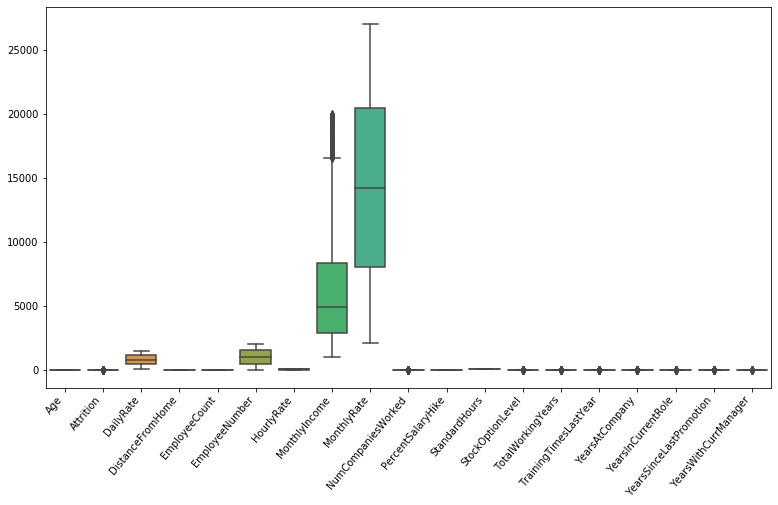

In [19]:
plt.figure(figsize = (13,7))
chart = sns.boxplot(data = df_scaling)
chart.set_xticklabels(chart.get_xticklabels(),
                     horizontalalignment='right', rotation=50)
plt.show()

##### plot sebelum scaling skaligus melihat outlayer

In [20]:
for col in df_scaling :
    df_scaling[[col]] = RobustScaler().fit_transform(df_scaling[[col]])

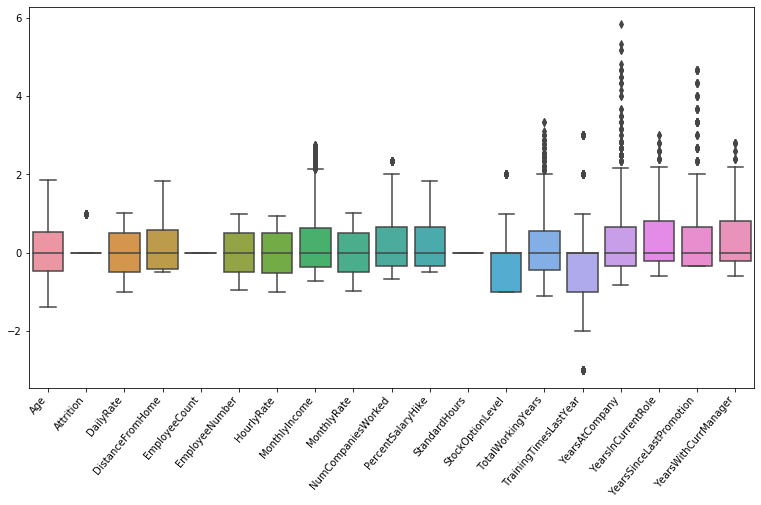

In [21]:
plt.figure(figsize = (13,7))
chart = sns.boxplot(data=df_scaling)
chart.set_xticklabels(chart.get_xticklabels(),
                     horizontalalignment='right', rotation=50)
plt.show()

##### plot sesudah scaling skaligus melihat outlayer

In [22]:
df_scaling

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,1.0,0.433526,-0.500000,0.0,-0.957727,0.783217,0.196416,0.422369,2.000000,-0.500000,0.0,-1.0,-0.222222,-3.0,0.166667,0.2,-0.333333,0.4
1,1.000000,0.0,-0.755780,0.083333,0.0,-0.956787,-0.139860,0.038588,0.859600,-0.333333,1.500000,0.0,0.0,0.000000,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,1.0,0.825145,-0.416667,0.0,-0.954908,0.727273,-0.517374,-0.953683,1.333333,0.166667,0.0,-1.0,-0.333333,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,0.0,0.852601,-0.333333,0.0,-0.953969,-0.279720,-0.367593,0.718797,-0.333333,-0.500000,0.0,-1.0,-0.222222,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,0.0,-0.304913,-0.416667,0.0,-0.952090,-0.727273,-0.265362,0.193040,2.333333,-0.333333,0.0,0.0,-0.444444,0.0,-0.500000,-0.2,0.333333,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,0.0,0.118497,1.333333,0.0,0.977454,-0.699301,-0.429407,-0.156712,0.666667,0.500000,0.0,0.0,0.777778,0.0,0.000000,-0.2,-0.333333,0.0
1466,0.230769,0.0,-0.273121,-0.083333,0.0,0.978394,-0.671329,0.927579,0.581699,0.666667,0.166667,0.0,0.0,-0.111111,2.0,0.333333,0.8,0.000000,0.8
1467,-0.692308,0.0,-0.934971,-0.250000,0.0,0.980272,0.587413,0.223665,-0.729913,-0.333333,1.000000,0.0,0.0,-0.444444,-3.0,0.166667,-0.2,-0.333333,0.0
1468,1.000000,0.0,0.319364,-0.416667,0.0,0.981212,-0.083916,0.086138,-0.079947,0.000000,0.000000,0.0,-1.0,0.777778,0.0,0.666667,0.6,-0.333333,1.0


### Labelling

In [23]:
df_labelling = df_cat.copy()

In [24]:
df_labelling

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,officer,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,officer,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,staff,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,staff,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,staff,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,officer,Laboratory Technician,Very High,Married,Y,No,Excellent,High,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Assistant Manager,Healthcare Representative,Low,Married,Y,No,Excellent,Low,Better
1467,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,officer,Manufacturing Director,Medium,Married,Y,Yes,Outstanding,Medium,Better
1468,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,officer,Sales Executive,Medium,Married,Y,No,Excellent,Very High,Good


seblum di lable

In [25]:
for col in df_labelling:
    df_labelling[col] = LabelEncoder().fit_transform(df_labelling[col])

In [26]:
df_labelling

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,2,1,2,0,0,3,7,3,2,0,1,0,1,0
1,1,1,1,1,0,1,2,3,6,2,1,0,0,1,3,2
2,2,1,2,4,3,1,2,4,2,0,2,0,1,0,2,2
3,1,1,4,1,3,0,0,4,6,0,1,0,1,0,0,2
4,2,1,1,3,1,1,0,4,2,2,1,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,2,3,0,1,3,3,2,3,1,0,0,0,0,2
1466,2,1,1,3,3,1,2,0,0,1,1,0,0,0,1,2
1467,2,1,0,1,2,1,3,3,4,2,1,0,1,1,2,2
1468,1,2,0,3,3,1,2,3,7,2,1,0,0,0,3,3


memberi lable pada variable discrite

#### CONCAT ALL DF

In [27]:
df_ready = pd.concat([df_scaling, df_labelling], axis =1)

In [28]:
df_ready

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,0.384615,1.0,0.433526,-0.500000,0.0,-0.957727,0.783217,0.196416,0.422369,2.000000,...,0,3,7,3,2,0,1,0,1,0
1,1.000000,0.0,-0.755780,0.083333,0.0,-0.956787,-0.139860,0.038588,0.859600,-0.333333,...,2,3,6,2,1,0,0,1,3,2
2,0.076923,1.0,0.825145,-0.416667,0.0,-0.954908,0.727273,-0.517374,-0.953683,1.333333,...,2,4,2,0,2,0,1,0,2,2
3,-0.230769,0.0,0.852601,-0.333333,0.0,-0.953969,-0.279720,-0.367593,0.718797,-0.333333,...,0,4,6,0,1,0,1,0,0,2
4,-0.692308,0.0,-0.304913,-0.416667,0.0,-0.952090,-0.727273,-0.265362,0.193040,2.333333,...,0,4,2,2,1,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,0.0,0.118497,1.333333,0.0,0.977454,-0.699301,-0.429407,-0.156712,0.666667,...,3,3,2,3,1,0,0,0,0,2
1466,0.230769,0.0,-0.273121,-0.083333,0.0,0.978394,-0.671329,0.927579,0.581699,0.666667,...,2,0,0,1,1,0,0,0,1,2
1467,-0.692308,0.0,-0.934971,-0.250000,0.0,0.980272,0.587413,0.223665,-0.729913,-0.333333,...,3,3,4,2,1,0,1,1,2,2
1468,1.000000,0.0,0.319364,-0.416667,0.0,0.981212,-0.083916,0.086138,-0.079947,0.000000,...,2,3,7,2,1,0,0,0,3,3


In [28]:
df = df_ready.copy()

di satukan scaling dan labellingnya menjadi dataset baru

## Splitting Data

In [29]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition'].values

In [30]:
#Split train data 80%, test data 20%

x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, shuffle = False)

#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=7, stratify=y)  

In [31]:
#Model
logre = LogisticRegression().fit(x_train, y_train)
ranfor = RandomForestClassifier().fit(x_train, y_train)

In [32]:
#model score
logre_score = logre.score(x_test,y_test)
ranfor_score = ranfor.score(x_test,y_test)

In [33]:
print(logre_score)

0.8843537414965986


In [34]:
print(ranfor_score)

0.8639455782312925


## Predict

In [35]:
#Logistic Regression
logre_pred = logre.predict(x_test)

#Random Forest
ranfor_pred = ranfor.predict(x_test)

### Logistic Regression

In [36]:
conmat_logre = confusion_matrix(y_test, logre_pred)
conmat_logre

array([[248,   3],
       [ 31,  12]], dtype=int64)

In [37]:
labels = ['No', 'Yes']

              precision    recall  f1-score   support

          No       0.89      0.99      0.94       251
         Yes       0.80      0.28      0.41        43

    accuracy                           0.88       294
   macro avg       0.84      0.63      0.67       294
weighted avg       0.88      0.88      0.86       294



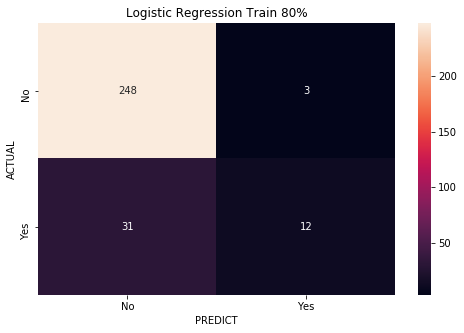

In [38]:
print(classification_report(y_test, logre_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Train 80%')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

### Random Forest

In [39]:
conf_ranfor = confusion_matrix(y_test, ranfor_pred)
conf_ranfor

array([[248,   3],
       [ 37,   6]], dtype=int64)

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       251
         Yes       0.67      0.14      0.23        43

    accuracy                           0.86       294
   macro avg       0.77      0.56      0.58       294
weighted avg       0.84      0.86      0.82       294



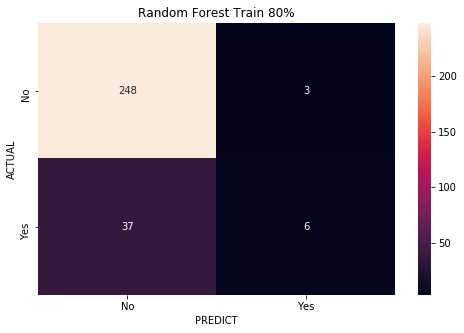

In [40]:
print(classification_report(y_test, ranfor_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_ranfor, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Train 80%')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

## Using SMOTE

In [41]:
x_train_res, y_train_res = SMOTE().fit_sample(x_train, y_train)

In [42]:
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (1964, 34)
After OverSampling, the shape of train_y: (1964,) 

After OverSampling, counts of label '1': 982
After OverSampling, counts of label '0': 982


In [43]:
#model
logre_smote = LogisticRegression().fit(x_train_res, y_train_res)
ranfor_smote = RandomForestClassifier().fit(x_train_res, y_train_res)

#Logistic Regression
logre_smote_pred = logre_smote.predict(x_test)

#Random Forest
ranfor_smote_pred = ranfor_smote.predict(x_test)

#### Logistic Regression smote

In [44]:
##Logistic Regression smote
conmat_logre_smote = confusion_matrix(y_test, logre_smote_pred)
conmat_logre_smote

array([[207,  44],
       [ 26,  17]], dtype=int64)

In [45]:
labels = ['No', 'Yes']

              precision    recall  f1-score   support

          No       0.89      0.82      0.86       251
         Yes       0.28      0.40      0.33        43

    accuracy                           0.76       294
   macro avg       0.58      0.61      0.59       294
weighted avg       0.80      0.76      0.78       294



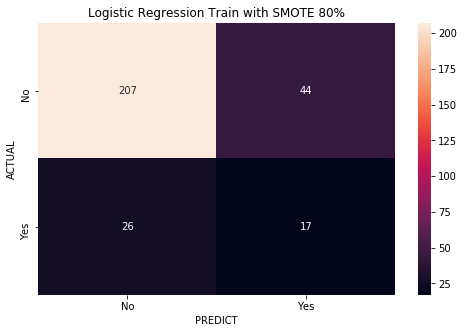

In [46]:
print(classification_report(y_test, logre_smote_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre_smote, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Train with SMOTE 80%')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

#### Random Forest smote

In [47]:
##Random Forest smote
conf_ranfor_smote = confusion_matrix(y_test, ranfor_smote_pred)
conf_ranfor_smote

array([[249,   2],
       [ 38,   5]], dtype=int64)

In [48]:
labels = ['No', 'Yes']

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       251
         Yes       0.71      0.12      0.20        43

    accuracy                           0.86       294
   macro avg       0.79      0.55      0.56       294
weighted avg       0.85      0.86      0.82       294



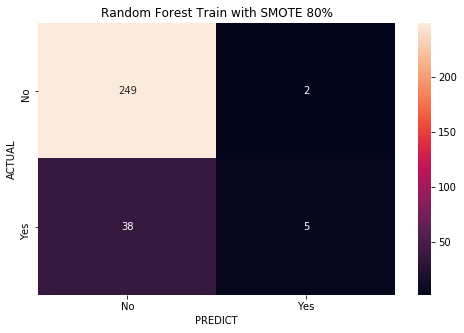

In [49]:
print(classification_report(y_test, ranfor_smote_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_ranfor_smote, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Train with SMOTE 80%')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

In [50]:
df_scaling = df.copy()

In [51]:
df_scaling.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,0.384615,1.0,0.433526,-0.500000,0.0,-0.957727,0.783217,0.196416,0.422369,2.000000,...,0,3,7,3,2,0,1,0,1,0
1,1.000000,0.0,-0.755780,0.083333,0.0,-0.956787,-0.139860,0.038588,0.859600,-0.333333,...,2,3,6,2,1,0,0,1,3,2
2,0.076923,1.0,0.825145,-0.416667,0.0,-0.954908,0.727273,-0.517374,-0.953683,1.333333,...,2,4,2,0,2,0,1,0,2,2
3,-0.230769,0.0,0.852601,-0.333333,0.0,-0.953969,-0.279720,-0.367593,0.718797,-0.333333,...,0,4,6,0,1,0,1,0,0,2
4,-0.692308,0.0,-0.304913,-0.416667,0.0,-0.952090,-0.727273,-0.265362,0.193040,2.333333,...,0,4,2,2,1,0,0,0,3,2


In [52]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

data scaling baru

# HYPER

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
# Logistic Regression

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = ['auto', 'balanced']
max_iter = [10, 100, 10000]
logre_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter, 'class_weight' : class_weight}

In [134]:
#Random Forest Classifier

max_depth = [10, 100, 1000]
min_samples_leaf = [100, 1000, 10000]
min_samples_split = [100, 200, 500]
n_estimators = [100, 200, 500]

ranfor_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 
             'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [138]:
# Logistic Regression
logre_hyper = RandomizedSearchCV(estimator = logre, param_distributions = logre_param, cv=5, scoring='recall').fit(x_train, y_train)

In [136]:
# Random Forest
ranfor_hyper = RandomizedSearchCV(estimator = ranfor, param_distributions = ranfor_param, cv=5).fit(x_train, y_train)

In [139]:
# Check Logistic Regression with hyper param
print('Hyper Model', logre_hyper.best_params_)

Hyper Model {'solver': 'saga', 'penalty': 'none', 'max_iter': 10, 'class_weight': 'auto'}


In [99]:
# Check Random Forest with hyper param
print('Hyper Model', ranfor_hyper.best_params_)

Hyper Model {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_depth': 100}


In [146]:
# applying model Logistic Regression with hyperparameter
logre_top = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 10, class_weight = 'balanced').fit(x_train, y_train)

In [152]:
# applying model Random Forest with hyperparameter
ranfor_top = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, min_samples_leaf = 100, max_depth = 100, class_weight = 'balanced').fit(x_train, y_train)

In [153]:
print(logre.score(x_train,y_train))

0.8613945578231292


score Logistic Regression tanpa hyperparameter

In [154]:
print(logre_top.score(x_train,y_train))

0.7321428571428571


score Logistic Regression tanpa hyperparameter

In [155]:
print(ranfor.score(x_train,y_train))

1.0


score Logistic Regression tanpa hyperparameter

In [156]:
print(ranfor_top.score(x_train,y_train))

0.7593537414965986


### predict with hyper

In [157]:
#Logistic Regression
logre_pred_top = logre_top.predict(x_test)

#Random Forest
ranfor_pred_top = ranfor_top.predict(x_test)

##### logistic regresion with hyperparam

In [158]:
conmat_logre_top = confusion_matrix(y_test, logre_pred_top)
conmat_logre_top

array([[186,  65],
       [ 14,  29]], dtype=int64)

              precision    recall  f1-score   support

          No       0.93      0.74      0.82       251
         Yes       0.31      0.67      0.42        43

    accuracy                           0.73       294
   macro avg       0.62      0.71      0.62       294
weighted avg       0.84      0.73      0.77       294



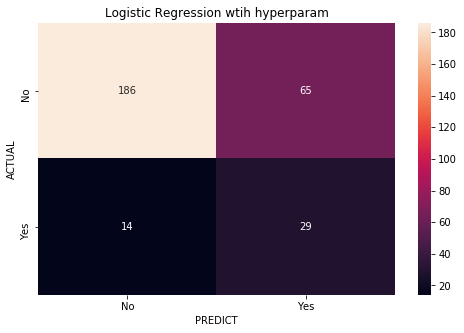

In [159]:
print(classification_report(y_test, logre_pred_top, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre_top, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression wtih hyperparam')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

##### Random Forest with hyperparam

In [160]:
conmat_ranfor_top = confusion_matrix(y_test, ranfor_pred_top)
conmat_ranfor_top

array([[190,  61],
       [ 14,  29]], dtype=int64)

              precision    recall  f1-score   support

          No       0.93      0.76      0.84       251
         Yes       0.32      0.67      0.44        43

    accuracy                           0.74       294
   macro avg       0.63      0.72      0.64       294
weighted avg       0.84      0.74      0.78       294



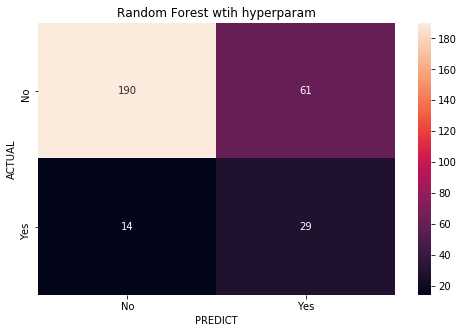

In [161]:
print(classification_report(y_test, ranfor_pred_top, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_ranfor_top, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest wtih hyperparam')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

### Using SMOTE with hyperparam

In [176]:
#model
logre_top_smote = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 10, class_weight = 'balanced').fit(x_train_res, y_train_res)
ranfor_top_smote = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, min_samples_leaf = 100, max_depth = 100, class_weight = 'balanced').fit(x_train_res, y_train_res)

In [177]:
#Logistic Regression
logre_top_smote_pred = logre_top_smote.predict(x_test)

In [178]:
##Logistic Regression smote hyper
conmat_logre_top_smote = confusion_matrix(y_test, logre_top_smote_pred)
conmat_logre_top_smote

array([[206,  45],
       [ 24,  19]], dtype=int64)

              precision    recall  f1-score   support

          No       0.90      0.82      0.86       251
         Yes       0.30      0.44      0.36        43

    accuracy                           0.77       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.81      0.77      0.78       294



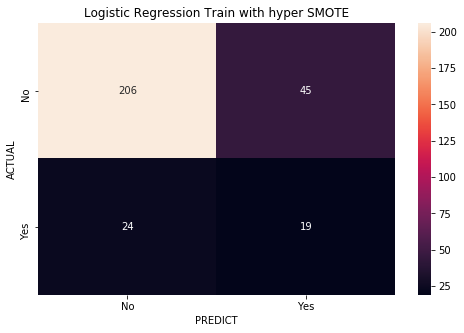

In [179]:
print(classification_report(y_test, logre_top_smote_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre_top_smote, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Train with hyper SMOTE')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

In [180]:
#Random Forest
ranfor_top_smote_pred = ranfor_top_smote.predict(x_test)

In [181]:
##Random Forest smote
conf_ranfor_top_smote = confusion_matrix(y_test, ranfor_top_smote_pred)
conf_ranfor_top_smote

array([[216,  35],
       [ 22,  21]], dtype=int64)

              precision    recall  f1-score   support

          No       0.91      0.86      0.88       251
         Yes       0.38      0.49      0.42        43

    accuracy                           0.81       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.83      0.81      0.82       294



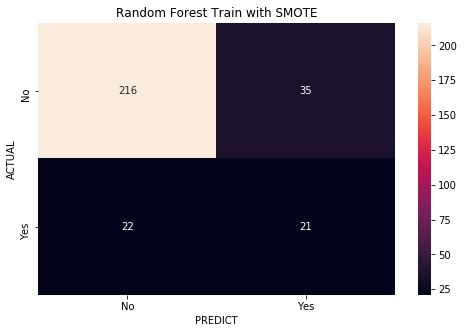

In [182]:
print(classification_report(y_test, ranfor_top_smote_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_ranfor_top_smote, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Train with SMOTE')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

In [29]:
df_ready.to_csv('datasets_IBM_clean_ready.csv', index = False)